<a href="https://colab.research.google.com/github/sudarshan-hub/optical-character-recognition/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training data set: ",x_train.shape)
print("Test data set: ",x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Training data set:  (60000, 28, 28)
Test data set:  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255 #Normalization
x_test /= 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0829 - accuracy: 0.9745
Epoch 2/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0533 - accuracy: 0.9830


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0504 - accuracy: 0.9830


[0.050376661121845245, 0.9829999804496765]

In [ ]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0238 - accuracy: 0.9925


[0.023804431781172752, 0.9925333261489868]

7


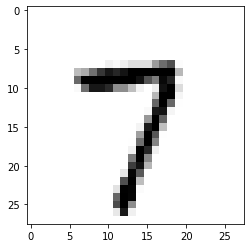

In [10]:
import matplotlib.pyplot as plt
image_index = 2887
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())